In [1]:
import pandas as pd
import numpy as np

import pymc3 as pm

from matplotlib import pyplot
%matplotlib inline

In [2]:
df = pd.read_csv('../data/data3.csv')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [tau_obs, beta, alpha]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 8000/8000 [00:10<00:00, 737.94draws/s]
The acceptance probability does not match the target. It is 0.6906210411242544, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\fmedeiros\.conda\envs\cs109b\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\fmedeiros\.conda\envs\cs109b\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\fmedeiros\.conda\envs

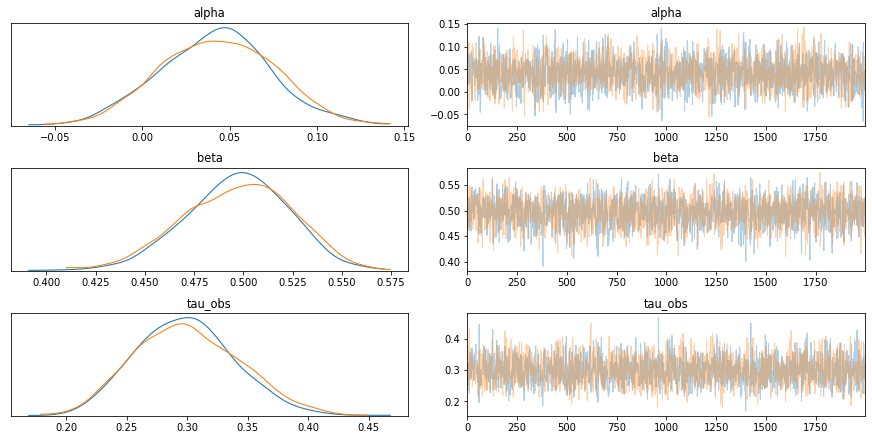

In [3]:
### edTest(test_pm_model) ###
np.random.seed(109)
with pm.Model() as model:
    # prior
    alpha = pm.Normal('alpha', mu=0, tau=1000)
    beta = pm.Normal('beta', mu=0, tau=1000)
    
    # likelihood
    # Next statement creates the expected value of mu_vec of the 
    # outcomes, specifying the linear relationship.
    # mu_vec is just the sum of the intercept alpha and the product of
    # the coefficient  beta and the predictor variable. 
    #mu_vec = pm.Deterministic('mu_vec', ____) 
    mu_vec = pm.Deterministic('mu_vec', alpha + beta * df['x'])
    
    tau_obs = pm.Gamma('tau_obs', 0.001, 0.001)
    #obs = pm.Normal(_______)  #Parameters to set: name, mu, tau, observed
    obs = pm.Normal('obs', mu=mu_vec, tau=tau_obs, observed=df['y'])  #Parameters to set: name, mu, tau, observed
    trace = pm.sample(2000, tune=2000, chains=2)
    pm.traceplot(trace, var_names=['alpha','beta','tau_obs'], compact=False);


In [4]:
#posterior means
np.mean(trace['alpha']),np.mean(trace['beta']), np.mean(trace['tau_obs'])

(0.041883373405960746, 0.4964426261684115, 0.2991371918207008)